In [0]:
import os
import os.path
import cv2
import glob
# import imutils
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from tensorflow.keras.models import load_model


In [0]:
import os
import os.path
import cv2
import glob
# import imutils
import matplotlib.pyplot as plt
import numpy as np

model = None

def predict(image):
    character = []
    plt.figure(figsize=(10, 16))
    data = []
    dim  = (5*image.shape[0],image.shape[1])

    image = cv2.resize(image,dim)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray = cv2.copyMakeBorder(gray, 40, 40, 40, 40, cv2.BORDER_REPLICATE)

    thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    kernel = np.ones((2,2),np.uint8)

    thresh = cv2.dilate(thresh,kernel,iterations =15)

    thresh = cv2.erode(thresh,kernel,iterations =4)

     
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  
    img1 = cv2.drawContours(image, contours, -1,(255,0,0),10)

    plt.imshow(image)

    letter_image_regions = []

    for contour in contours:
        
        (x, y, w, h) = cv2.boundingRect(contour)
        
           
        if w / h > 5.25:
      
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))

            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
          
            letter_image_regions.append((x, y, w, h))

        
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    max_w = np.mean(letter_image_regions[:2])

    max_h = np.mean(letter_image_regions[:3])

          
    count=0

    k = [ 4,6 , 7,  8,  9, 10 ,12, 13, 14, 15, 20, 21, 22, 30, 31, 32, 33, 35 ,37, 39, 40, 43]

    letter_image_regions = np.asarray(letter_image_regions)

    for letter_bounding_box  in letter_image_regions:

            # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        if w <  (0.2*max_w) or h < (0.2*max_h):

            continue

        letter_image = thresh[max(0,y - 40):min(y + h +40,image.shape[0]) , max(0,x - 90):min(x + w + 90,image.shape[1])]



        plt.subplot(10, 5, count+1)
        

        dim = (28, 28)
        plt.imshow(letter_image)
        resize = cv2.resize(letter_image, dim)
        
        data.append(resize)

        count = count + 1
        
        

        
       
    data = np.asarray(data)
    data = data.reshape(data.shape[0],28,28,1)
    data = data.astype('float32')
    data/=255
    k = [ 4,6 , 7,  8,  9, 10 ,12, 13, 14, 15, 20, 21, 22, 30, 31, 32, 33, 35 ,37, 39, 40, 43]
    y_pred = model.predict(data)
    inf =  10000000
    for i in y_pred:
      mx = -inf
      for j in range(22):
        if i[j] > mx:
            mx = i[j]
            ans = j
     
      ans = k[ans]  
      if(ans<=9):

        character.append(chr(ans+48))

      elif (ans<=35):

        character.append(chr(ans-10+65))

      else:
        character.append(chr(ans-36+97))

    
    captcha_text = "".join(character)
    print(captcha_text)
    return captcha_text

          


L7AKW
XXZ4E
DMA4
The final score of the participant is 10


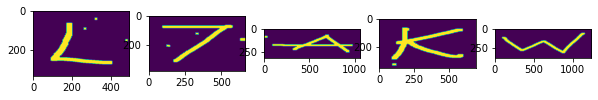

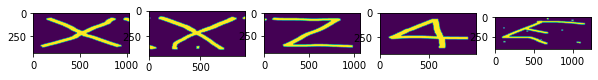

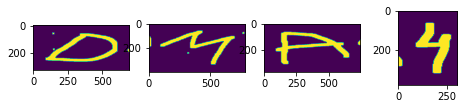

In [0]:
def test():
    '''
    We will be using a similar template to test your code
    '''
    global model
    model = load_model("/content/drive/My Drive/submission/final.h5")
    image_paths = ['/content/drive/My Drive/submission/a6.png','/content/drive/My Drive/submission/newimage2.jpeg','/content/drive/My Drive/submission/a7.png']
    correct_answers = ['KCDEF','WWKLM','DMA4']
    score = 0
    for i,image_path in enumerate(image_paths):
        image = cv2.imread(image_path) # This input format wont change
        answer = predict(image) # a string is expected

        if correct_answers[i] == answer:
            score += 10
   
    print('The final score of the participant is',score)


if __name__ == "__main__":
    test()